## Dataset Setup


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"iamcoolkyle","key":"5ed425806478d6d3b94c98d5b4c2d047"}'}

In [ ]:
!mkdir -p ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
 99% 2.68G/2.70G [00:33<00:00, 152MB/s]
100% 2.70G/2.70G [00:33<00:00, 87.2MB/s]


In [ ]:
import os

# List all directories and files under 'datasets'
for root, dirs, files in os.walk("datasets"):
    print(f"Directory: {root}")
    for dir_name in dirs:
        print(f"  Sub-directory: {dir_name}")
    for file_name in files:
        print(f"  File: {file_name}")

In [ ]:
import zipfile
import os
import shutil

# Unzip the downloaded file
with zipfile.ZipFile("new-plant-diseases-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("datasets")

# Search for 'train' and 'valid' directories
train_path = None
valid_path = None

for root, dirs, files in os.walk("datasets"):
    if 'train' in dirs:
        train_path = os.path.join(root, 'train')
    if 'valid' in dirs:
        valid_path = os.path.join(root, 'valid')

# Check if paths are found
if train_path and valid_path:
    print(f"Found train directory at: {train_path}")
    print(f"Found valid directory at: {valid_path}")

    # Move the train and valid directories to the base 'datasets' directory
    shutil.move(train_path, os.path.join("datasets", "train"))
    shutil.move(valid_path, os.path.join("datasets", "valid"))
    print("Train and Valid directories moved successfully!")
else:
    print("Train or Valid directories not found.")


Found train directory at: datasets/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train
Found valid directory at: datasets/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid
Train and Valid directories moved successfully!


## Importing Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'datasets/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[229.25 220.25 225.25]
   [232.   223.   228.  ]
   [224.5  215.5  220.5 ]
   ...
   [242.75 237.75 243.75]
   [241.75 236.75 242.75]
   [243.5  238.5  244.5 ]]

  [[232.25 224.75 229.25]
   [226.75 217.75 222.75]
   [221.   212.   217.  ]
   ...
   [246.5  241.5  247.5 ]
   [242.75 237.75 243.75]
   [242.   237.   243.  ]]

  [[228.75 219.75 224.75]
   [229.5  220.5  225.5 ]
   [221.   212.   217.  ]
   ...
   [247.   242.   248.  ]
   [243.25 238.25 244.25]
   [242.5  237.5  243.5 ]]

  ...

  [[211.25 201.25 210.25]
   [219.   209.   218.  ]
   [214.75 204.75 213.75]
   ...
   [213.75 205.75 216.75]
   [218.25 210.25 221.25]
   [223.75 215.75 226.75]]

  [[201.5  191.5  200.5 ]
   [201.   191.   200.  ]
   [202.75 192.75 201.75]
   ...
   [215.   207.   218.  ]
   [217.75 209.75 220.75]
   [224.   216.   227.  ]]

  [[211.75 201.75 210.75]
   [204.   194.   203.  ]
   [205.   195.   204.  ]
   ...
   [218.   210.   221.  ]
   [218.75 210.75 221.75]
   [228.25 220.25 23

### Validation Image Preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'datasets/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model

### Building Convolution Layer

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Input,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Input(shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Dropout(0.2))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [ ]:
#Flattenening the CNN
model.add(Flatten())

In [ ]:
#Hidden Layer
model.add(Dense(units=1024,activation='relu'))

In [ ]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

##Compiling and Training Phase

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,989,446 (68.62 MB)

 Trainable params: 17,989,446 (68.62 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [ ]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 60ms/step - accuracy: 0.3961 - loss: 2.2961 - val_accuracy: 0.8446 - val_loss: 0.5006
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 119s 54ms/step - accuracy: 0.8556 - loss: 0.4466 - val_accuracy: 0.8747 - val_loss: 0.3867
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 54ms/step - accuracy: 0.9037 - loss: 0.2916 - val_accuracy: 0.8939 - val_loss: 0.3289
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9264 - loss: 0.2254 - val_accuracy: 0.9051 - val_loss: 0.2956
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 126s 57ms/step - accuracy: 0.9381 - loss: 0.1862 - val_accuracy: 0.9041 - val_loss: 0.3323
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 54ms/step - accuracy: 0.9386 - loss: 0.1839 - val_accuracy: 0.9070 - val_loss: 0.3136
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 54ms/step - accuracy: 0.9405 - loss: 0.1821 - val_accuracy: 0.9009 - val_loss: 0.3468
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 147s 56ms/step - accuracy: 

## Model Evaluation

In [ ]:
train_loss , train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - accuracy: 0.9367 - loss: 0.2182


In [ ]:
print(train_loss,train_acc)

0.20514965057373047 0.9410057663917542


In [ ]:
val_loss , val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8917 - loss: 0.5019


In [ ]:
print(val_loss,val_acc)

0.4981527030467987 0.8893125653266907


##Saving Model

In [ ]:
model.save("trained_model.keras")

##Recording Training History




In [ ]:
training_history.history

{'accuracy': [0.6142969131469727,
  0.8717547655105591,
  0.909239649772644,
  0.9255707859992981,
  0.9373781681060791,
  0.9416601657867432,
  0.9446333050727844,
  0.9502525329589844,
  0.9530549645423889,
  0.9514048099517822],
 'loss': [1.325913906097412,
  0.3944302797317505,
  0.276754766702652,
  0.22602693736553192,
  0.1905786544084549,
  0.1781030148267746,
  0.1700706034898758,
  0.15250720083713531,
  0.14722271263599396,
  0.1533660590648651],
 'val_accuracy': [0.8445823192596436,
  0.8746870160102844,
  0.8938652276992798,
  0.905076265335083,
  0.9041088223457336,
  0.9070111513137817,
  0.9008650183677673,
  0.9171409010887146,
  0.8704757690429688,
  0.8893125653266907],
 'val_loss': [0.500599205493927,
  0.38672032952308655,
  0.328890860080719,
  0.29558780789375305,
  0.3323492109775543,
  0.3136190176010132,
  0.3467637896537781,
  0.2878621518611908,
  0.5348516702651978,
  0.4981527030467987]}

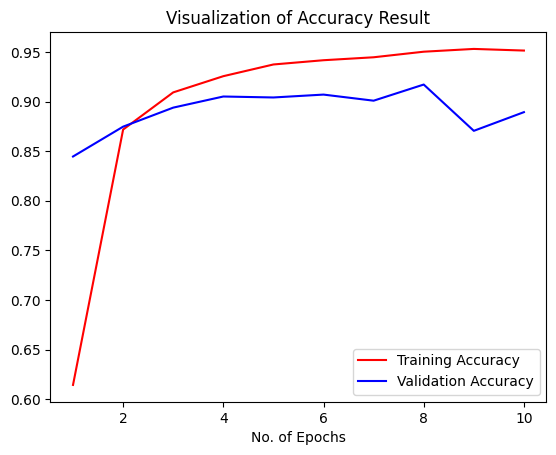

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

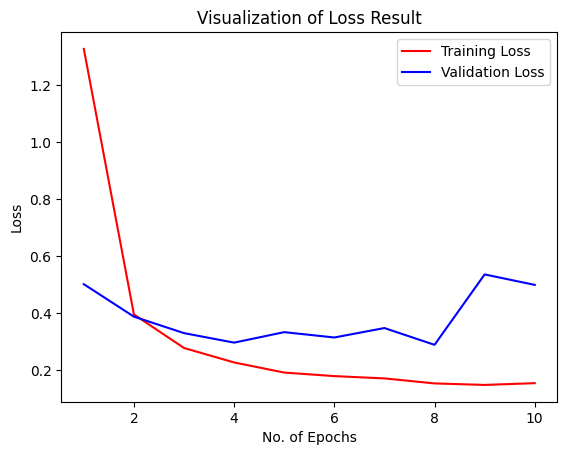

In [ ]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

## Model Evaluation Using Some Other Metrics

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'datasets/valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step


(array([[1.00000000e+00, 1.48051005e-09, 8.97752751e-16, ...,
         6.65977922e-25, 3.83287191e-19, 1.50087696e-19],
        [9.99930739e-01, 9.03104865e-06, 1.13951502e-12, ...,
         1.05044675e-17, 4.83527784e-15, 1.99799566e-10],
        [9.99902725e-01, 4.05675451e-07, 4.42187649e-12, ...,
         5.33737324e-16, 8.18156168e-11, 3.81407865e-08],
        ...,
        [4.08931646e-06, 3.03634122e-15, 3.12019125e-07, ...,
         4.25646590e-07, 7.83377790e-12, 8.91555369e-01],
        [7.56894615e-14, 2.33599774e-28, 4.20222841e-12, ...,
         2.84909856e-11, 6.29093355e-18, 9.99999762e-01],
        [1.44682020e-14, 2.00785752e-17, 7.63875562e-13, ...,
         1.35178173e-16, 6.96814340e-08, 9.99986649e-01]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set] , axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories , axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.84      0.90       504
                                 Apple___Black_rot       0.97      0.96      0.96       497
                          Apple___Cedar_apple_rust       0.96      0.80      0.88       440
                                   Apple___healthy       0.94      0.86      0.90       502
                               Blueberry___healthy       0.89      0.95      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.92      0.95       421
                 Cherry_(including_sour)___healthy       0.96      0.95      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.84      0.86       410
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.89      0.90      0.

##Prediction of Test Images

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
model1 = tf.keras.models.load_model('trained_model.keras')

In [ ]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      16,778,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,968,340 (205.87 MB)

 Trainable params: 17,989,446 (68.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 35,978,894 (137.25 MB)

###Visualizing Single Image from Test Set

<function matplotlib.pyplot.show(close=None, block=None)>

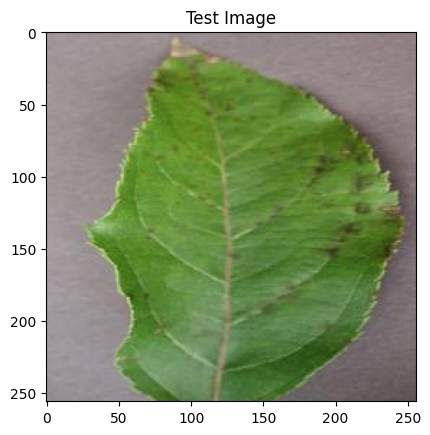

In [ ]:
import cv2
image_path = "/content/datasets/test/test/AppleScab1.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
plt.imshow(img)
plt.title("Test Image")
plt.show

###Testing Model

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)
predictions,predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(array([[9.8425537e-01, 2.2782968e-08, 2.1823551e-07, 7.1809745e-07,
         4.8804006e-11, 3.3384247e-11, 5.2854591e-07, 1.2507882e-10,
         1.2100132e-11, 1.5896667e-07, 5.7469703e-13, 4.6837889e-10,
         8.8974245e-11, 6.0728100e-10, 8.2200437e-05, 1.2014531e-08,
         1.4020476e-02, 1.4290472e-10, 6.0370297e-05, 5.0967326e-04,
         1.2748964e-13, 3.1800082e-07, 7.0615210e-06, 6.8596696e-06,
         6.6032146e-07, 5.2017811e-08, 2.5758691e-08, 4.6432508e-08,
         4.1966641e-06, 4.9255018e-06, 9.5212457e-08, 1.1289061e-08,
         1.0446932e-03, 7.7183279e-07, 1.9909152e-07, 1.9229061e-07,
         8.9963047e-13, 1.2765511e-09]], dtype=float32),
 (1, 38))

In [ ]:
result_index = np.argmax(predictions)
result_index

0

In [ ]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

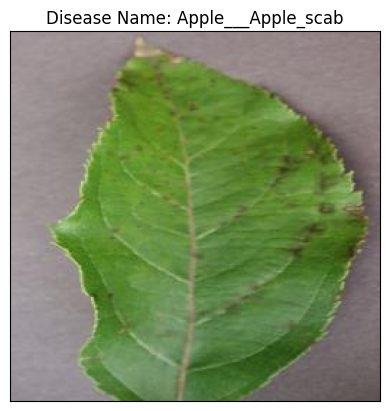

In [ ]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
from google.colab import files

# Download the file to your local system
files.download("trained_model.keras")

FileNotFoundError: Cannot find file: trained_model.keras